In [1]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
plt.style.use('fivethirtyeight')
from fri import plot_dendrogram_and_intervals
from fri import plot

%matplotlib inline
from fri import genClassificationData
import sys
sys.path.append("../dev_scripts/")
from exp_tools import gen_split_feature,gen_quadrant_problem

#X,y = genClassificationData(n_samples=200, n_features=20,n_strel=4, n_redundant=8,
#                    n_repeated=0, flip_y=0,random_state=2,partition=[4,4])

#X,y =  genClassificationData(n_samples=200, n_features=20,n_strel=5, n_redundant=5,
#                    n_repeated=0, flip_y=0,random_state=4)

In [2]:
X,y = gen_quadrant_problem()
#X,y = gen_split_feature()

from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [49]:
from fri import FRIClassification
fri = FRIClassification(optimum_deviation=0.2,C=0.000526,debug=True)

In [50]:
fri.fit(X_scaled,y)

/home/lpfannschmidt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lpfannschmidt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lpfannschmidt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lpfannschmidt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


loss 3462.60907922
L1 0.847578513776
C 0.000526
score 0.327571707631
coef:
[[  2.93649595e-01]
 [  4.12665833e-01]
 [ -9.34842868e-14]
 [ -2.41426951e-14]]


In [51]:
fri.optim_model_.score(X,y)

0.7498943729594777

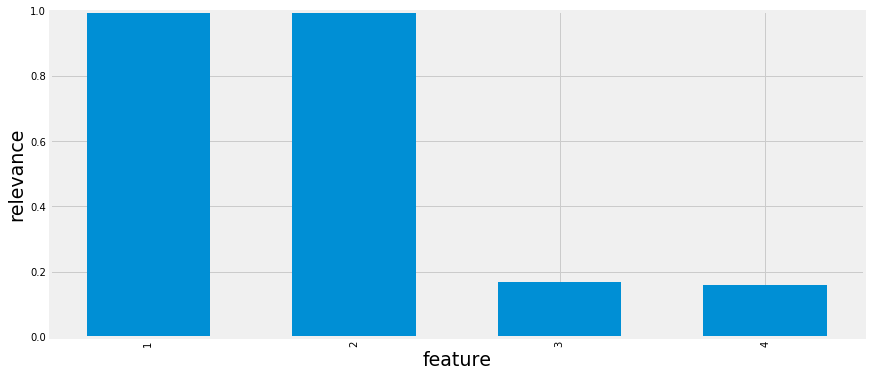

In [52]:
p = plot.plotIntervals(fri.interval_)

In [53]:
fri.interval_

array([[ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  0.16903143],
       [ 0.        ,  0.1606269 ]])

In [54]:
from exp_tools import *

In [102]:
clust, link, feat_points,dist_mat = fri.community_detection2(X_scaled,y,mode="both")

In [103]:
from fri.utils import similarity,similarity2

In [104]:
p1 = feat_points[0]
p2 =  feat_points[1]

In [105]:
similarity(p1,p2)

-3.0377505497266731e-11

In [106]:
similarity2(p1,p2)

1.8204509052220172e-11

In [107]:
clust

array([1, 1, 2, 2], dtype=int32)

In [108]:
import scipy.spatial.distance

In [109]:
dist_mat = scipy.spatial.distance.squareform(dist_mat)

In [110]:
from scipy.cluster.hierarchy import fcluster
max_clusters = 3
feature_clustering = fcluster(link, max_clusters, criterion="maxclust")


In [111]:
feature_clustering

array([1, 1, 2, 2], dtype=int32)


# New community detection using  constrained problems

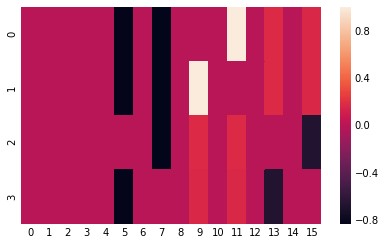

In [112]:
sns.heatmap(feat_points)

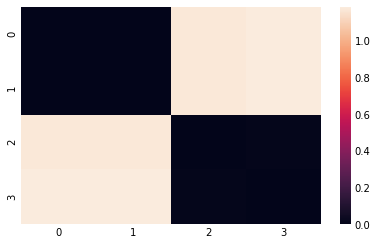

In [113]:
sns.heatmap(dist_mat)

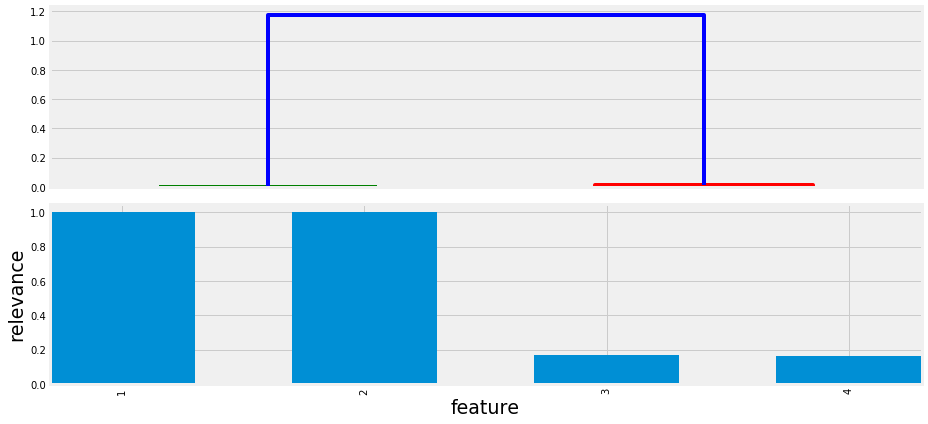

In [114]:
p = plot_dendrogram_and_intervals(fri.interval_,link)

# Old community detection using differnce between optimal solution and unconstrained problem

In [115]:
clust, link, dist_mat = fri.community_detection()

In [116]:
clust

array([1, 1, 2, 3], dtype=int32)

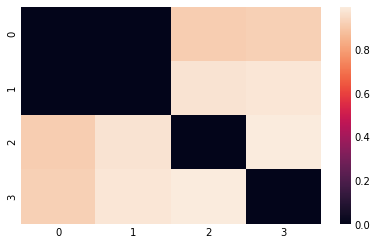

In [117]:
sns.heatmap(dist_mat)

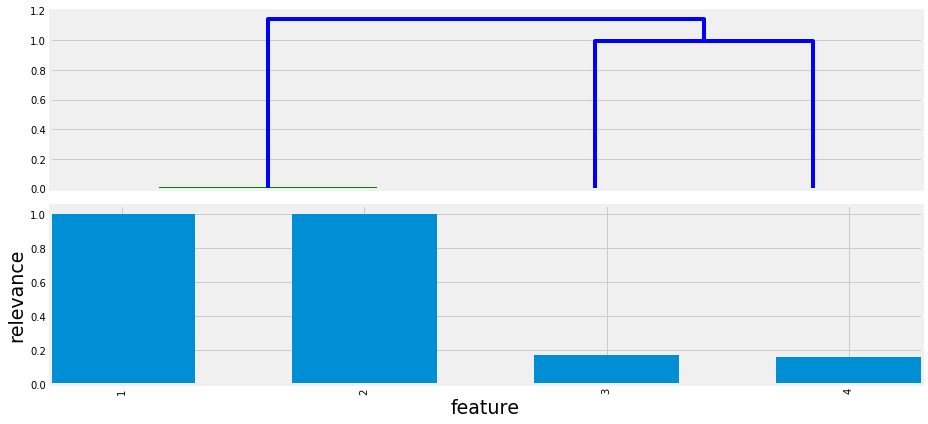

In [118]:
p = plot_dendrogram_and_intervals(fri.interval_,link)

# Simple Correlation 

/home/lpfannschmidt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # This is added back by InteractiveShellApp.init_path()


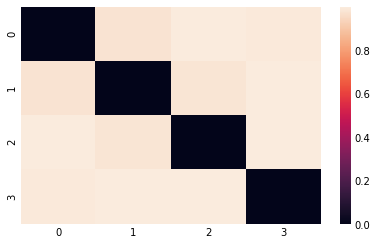

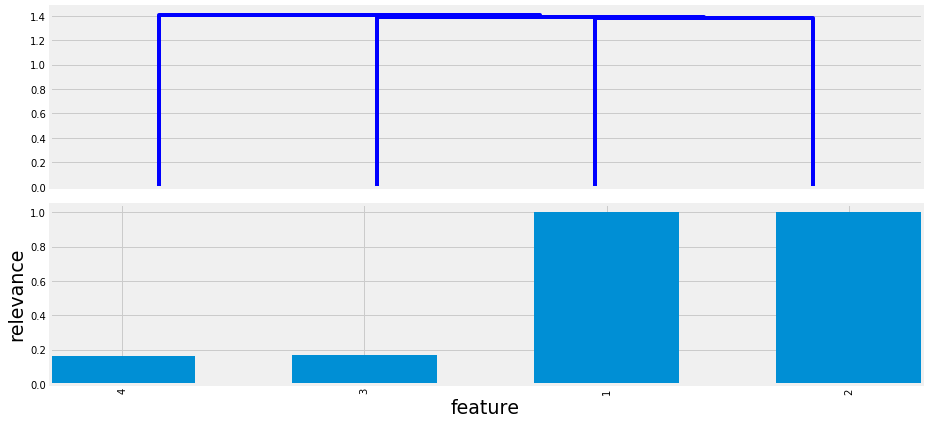

In [85]:
import pandas as pd
corr_pd = pd.DataFrame(X_scaled).corr()

corr_pd = 1-corr_pd.abs()
corr_pd = corr_pd.values

sns.heatmap(corr_pd)

from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage
z = linkage(corr_pd,method="single")
threshold = 0.55*np.max(z[:, 2])
p = plot.plot_dendrogram_and_intervals(fri.interval_,z)